In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from heat_1d_2d import heat_1d_nn, heat_2d_nn

np.random.seed(238)
torch.manual_seed(301)

/workspaces/Project-3-Applied-ML/Archiv/Lars/heat_1d_2d.py:83: SyntaxWarning: invalid escape sequence '\D'
  u_t - \Delta u = f


Epoch 0, Loss: 5.916036
Epoch 50, Loss: 3.876897
Epoch 100, Loss: 1.929429
Epoch 150, Loss: 1.307244
Epoch 200, Loss: 0.964541
Epoch 250, Loss: 0.741734
Epoch 300, Loss: 0.587532
Epoch 350, Loss: 0.475352
Epoch 400, Loss: 0.390339
Epoch 450, Loss: 0.324135
Epoch 499, Loss: 0.272415


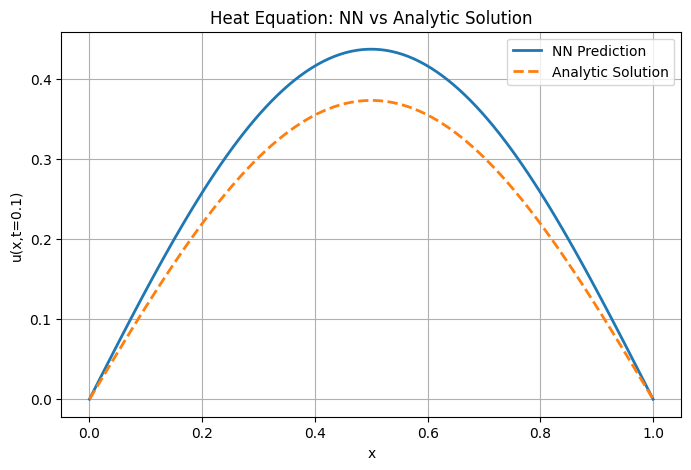

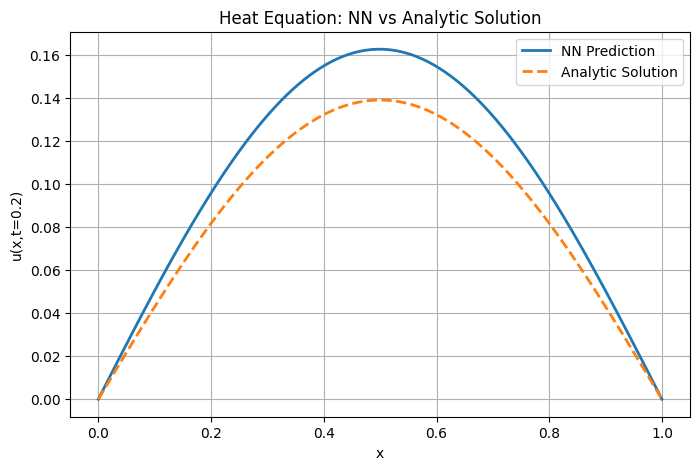

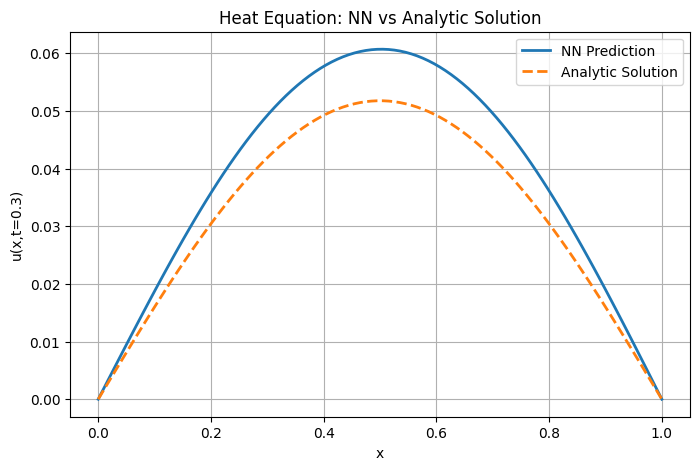

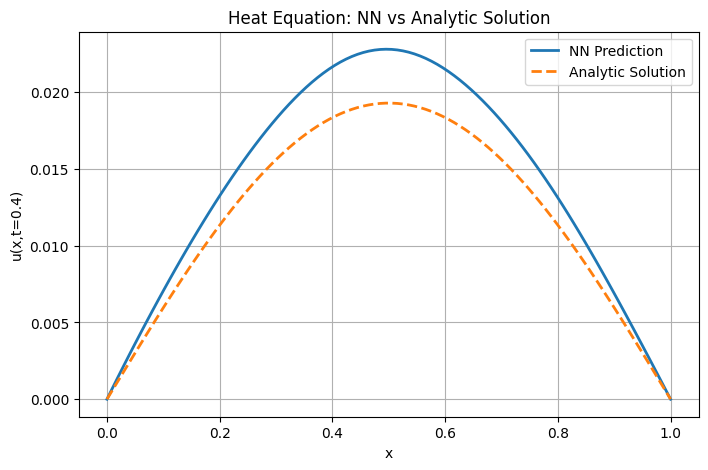

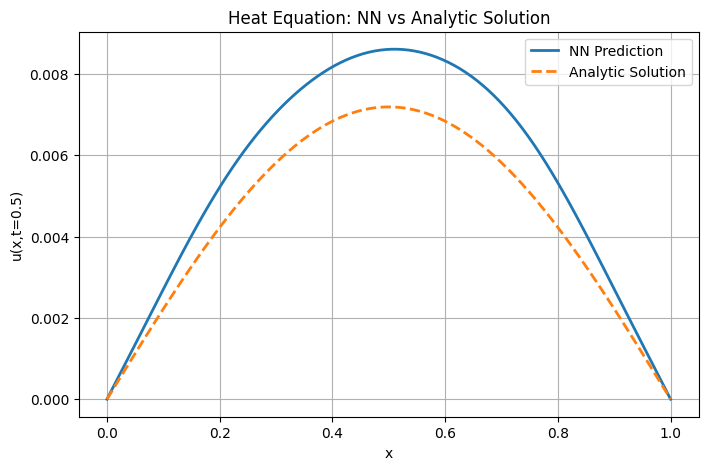

In [2]:
layers = [200, 100, 50, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
pde_nn = heat_1d_nn(layers, activations)

N_colloc = 100
# x_colloc = torch.rand(N_colloc, 1)
# t_colloc = torch.rand(N_colloc, 1)
# x_colloc = torch.linspace(0,1,N_colloc).view(-1,1)
# t_colloc = torch.linspace(0,1,N_colloc).view(-1,1)

x_colloc = [x for x in torch.linspace(0, 1, N_colloc).view(-1,1)] * N_colloc
t_colloc_temp = [[t for _ in range(N_colloc)] for t in torch.linspace(0, 1, N_colloc).view(-1,1)]
t_colloc = []
for sublist in t_colloc_temp:
    t_colloc.extend(sublist)
x_colloc = torch.tensor(x_colloc).view(-1,1)
t_colloc = torch.tensor(t_colloc).view(-1,1)

pde_nn.train(x_colloc, t_colloc, lr=1e-3, weight_decay=0, epochs = 500, print_epochs=50)
#proper result for epochs =5000

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    x_test = torch.linspace(0,1,100).view(-1,1)
    t_test = torch.tensor([[t]]*100)  # t=0.5
    u_pred = pde_nn.trial_solution(x_test, t_test).detach().numpy()


    #compare results with analytic solution

    x_np = x_test.numpy().flatten()  # convert to 1D array for plotting
    t_val = t
    u_analytic = np.sin(np.pi * x_np) * np.exp(-np.pi**2 * t_val)

    # Plot the results
    plt.figure(figsize=(8,5))
    plt.plot(x_np, u_pred, label='NN Prediction', linewidth=2)
    plt.plot(x_np, u_analytic, '--', label='Analytic Solution', linewidth=2)
    plt.xlabel('x')
    plt.ylabel(f'u(x,t={t})')
    plt.title('Heat Equation: NN vs Analytic Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
"""
2D Heat equation
"""

layers = [200, 100, 50, 1]
activations = [torch.tanh]*(len(layers)-1) + [None]


N_colloc = 10000
x_colloc = torch.rand(N_colloc, 1)
y_colloc = torch.rand(N_colloc, 1)
t_colloc = torch.rand(N_colloc, 1)

pde_nn = heat_2d_nn(layers, activations)

pde_nn.train(x_colloc, y_colloc, t_colloc, lr=1e-3, weight_decay=0, epochs = 1_000, print_epochs=100)
#proper result for epochs =5000

x_test = torch.linspace(0,1,100).view(-1,1)
y_test = torch.linspace(0,1,100).view(-1,1)
t_test = torch.tensor([[0.001]]*100)  # t=0.001
u_pred = pde_nn.trial_solution(x_test, y_test, t_test).detach().numpy()


#compare results with analytic solution

x_np = x_test.numpy().flatten()  # convert to 1D array for plotting
y_np = y_test.numpy().flatten()
t_val = 0.5
u_analytic = np.sin(np.pi * x_np) * np.sin(np.pi * y_np) * np.exp(
    -2 * np.pi**2 * t_val) + np.sin(2 * np.pi * x_np) * np.sin(4 * np.pi * x_np
    ) * np.exp(-20 * np.pi**2 * t_val)

Epoch 0, Loss: 9729.363281
Epoch 100, Loss: 9321.371094
Epoch 200, Loss: 9107.053711
Epoch 300, Loss: 8792.874023
Epoch 400, Loss: 7021.835938
Epoch 500, Loss: 4788.136230
Epoch 600, Loss: 4008.713623
Epoch 700, Loss: 3217.027588
Epoch 800, Loss: 2766.715088
Epoch 900, Loss: 2488.868896
Epoch 999, Loss: 2270.819092
